# 關聯分析 Relation Analysis
作者: 李采蓉

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## 1. 載入資料 Data Loading
取`Gender`, `Age`, `Ori. Memb.`, `Year`, `Company`五個因素

In [2]:
boys=pd.read_csv("./data/kpop_boy_groups.csv")
girls=pd.read_csv("./data/kpop_girl_groups.csv")
yt=pd.read_csv("./data/youtube.csv")

In [3]:
boys.head()

,Name,Short,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active,Average_age
0,100%,NaN,2012/9/18,TOP Media,4,7,Perfection,Yes,20.0
1,14U,NaN,2017/4/17,BG,14,14,NaN,Yes,22.0
2,1the9,NaN,2019/2/9,MBK,9,9,NaN,Yes,19.0
3,24K,NaN,2012/9/6,Choeun,8,6,24U,Yes,22.0
4,2AM,NaN,2008/6/21,"JYP, Big Hit",4,4,I Am,No,20.0


In [4]:
girls.head()

,Name,Short,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active,Average_age
0,(G)I-DLE,NaN,2018/5/2,Cube,6,6,NaN,Yes,20.0
1,15&,NaN,2012/10/5,JYP,2,2,NaN,No,15.0
2,2EYES,NaN,2013/7/20,SidusHQ,4,5,NaN,No,19.0
3,2NE1,NaN,2009/5/6,YG,4,4,Blackjack,No,21.0
4,3YE,NaN,2019/5/21,GH,3,3,NaN,Yes,21.0


In [5]:
yt.head()

,Name,Date,Likes,Views,Comments
0,Agust D,2020-05-22,14797047,441791136,1368655
1,Yubin,2020-05-21,53399,1184969,2722
2,OnlyOneOf,2020-05-21,84254,7569079,3995
3,Ryu Sujeong,2020-05-20,43251,2663847,3500
4,Crush,2020-05-20,663484,18084352,31972


## 2. 資料預處理 Data Preprocessing

In [6]:
# boys資料前處理
boys["Gender"]="M"
boys_n=boys.drop(["Short", "Members", "Fanclub Name", "Active"], axis=1)
boys_n.dropna(subset=["Average_age"], inplace=True)
boys_n["Debut"]=pd.to_datetime(boys_n["Debut"], format='%Y-%m-%d')
#boys_n.set_index("Name", inplace=True)
boys_n=boys_n.sort_values("Debut")

# girls資料前處理
girls["Gender"]="F"
girls_n=girls.drop(["Short", "Members", "Fanclub Name", "Active"], axis=1)
girls_n.dropna(subset=["Average_age"], inplace=True)
girls_n["Debut"]=pd.to_datetime(girls_n["Debut"], format='%Y-%m-%d')
#girls_n.set_index("Name", inplace=True)
girls_n=girls_n.sort_values("Debut")

# merge
Factors=pd.merge(boys_n, girls_n, how="outer")
Factors['Company Code'] = pd.factorize(Factors['Company'])[0]
Factors=Factors.sort_values("Debut")
Factors.set_index("Name", inplace=True)
Factors.head()

,Debut,Company,Orig. Memb.,Average_age,Gender,Company Code
Name,,,,,,
Turbo,1995-09-06,"MBK, Turbo Co.",2,14.0,M,0
H.O.T,1996-09-07,SM,5,17.0,M,1
SECHKIES,1997-04-15,"DSP, YG",6,18.0,M,2
Baby V.O.X,1997-07-05,DR Music,5,16.0,F,109
S.E.S,1997-11-01,SM,3,16.0,F,1


In [7]:
# 出道團員數量平均
boys_mem_num=boys_n["Orig. Memb."].mean()
girls_mem_num=girls_n["Orig. Memb."].mean()
Factors_mem_num=Factors["Orig. Memb."].mean()
print("出道團員數量平均:\n男性\t", boys_mem_num, "\n女性\t", girls_mem_num, "\n全部\t", Factors_mem_num, "\n")

# 出道年紀平均
boys_age_num=boys_n["Average_age"].mean()
girls_age_num=girls_n["Average_age"].mean()
Factors_age_num=Factors["Average_age"].mean()
print("出道團員年紀平均:\n男性\t", boys_age_num, "\n女性\t", girls_age_num, "\n全部\t", Factors_age_num)

出道團員數量平均:
男性	 6.363013698630137 
女性	 5.422818791946309 
全部	 5.888135593220339 

出道團員年紀平均:
男性	 20.958904109589042 
女性	 20.033557046979865 
全部	 20.491525423728813


## 3. 散佈圖 Scatter Plot
### 3.1 年份與出道團員數量 散佈圖

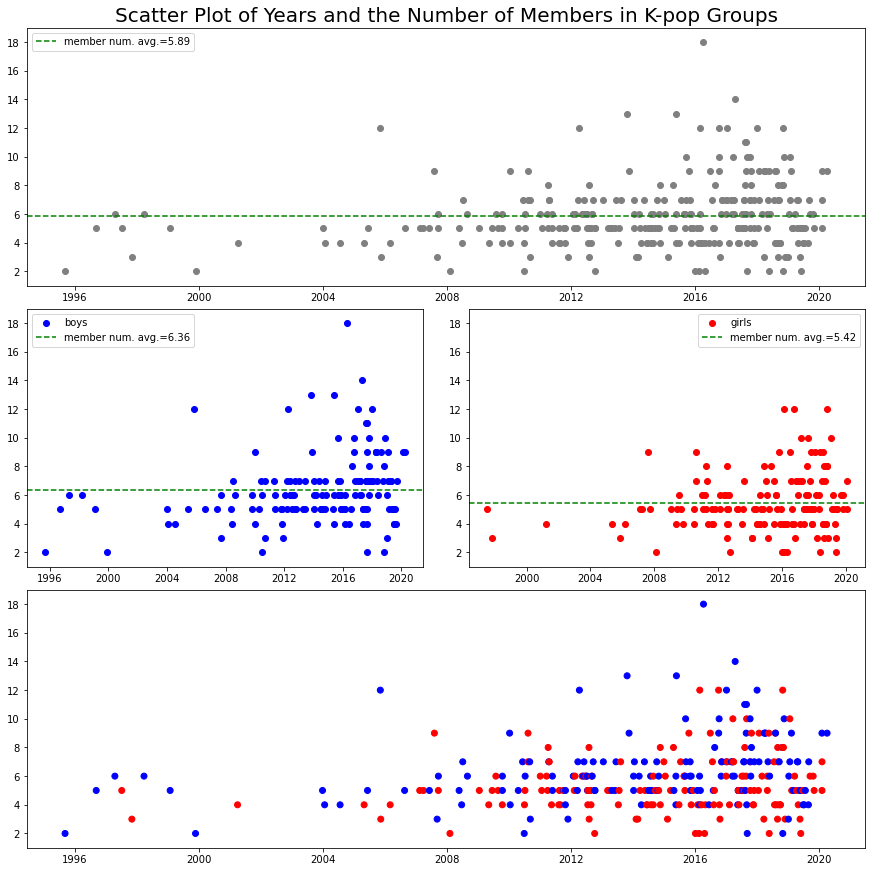

In [8]:
fig=plt.figure(layout="constrained", figsize=(12,12))
mosaic=fig.subplot_mosaic('''
                          aa
                          bc
                          dd
                          ''')

# Plot A, main
mosaic['a'].scatter(Factors["Debut"], Factors["Orig. Memb."], c='grey')
mosaic['a'].set_title("Scatter Plot of Years and the Number of Members in K-pop Groups", fontsize=20)
mosaic['a'].set_ylim(1, 19)
mosaic['a'].axhline(y=Factors_mem_num, color='green', linestyle='--', label="member num. avg.="+str(round(Factors_mem_num, 2)))
mosaic['a'].legend()

# Plot B, boys
mosaic['b'].scatter(boys_n["Debut"], boys_n["Orig. Memb."], c="blue", label="boys")
mosaic['b'].set_ylim(1, 19) 
mosaic['b'].axhline(y=boys_mem_num, color='green', linestyle='--', label="member num. avg.="+str(round(boys_mem_num, 2)))
mosaic['b'].legend()

# Plot C, girls
mosaic['c'].scatter(girls_n["Debut"], girls_n["Orig. Memb."], c="red", label="girls")
mosaic['c'].set_ylim(1, 19) 
mosaic['c'].axhline(y=girls_mem_num, color='green', linestyle='--', label="member num. avg.="+str(round(girls_mem_num, 2)))
mosaic['c'].legend()

# Plot D, combined
mosaic['d'].scatter(Factors["Debut"], Factors["Orig. Memb."], c=Factors["Gender"].map({"M": "blue", "F": "red"}))
mosaic['d'].set_ylim(1, 19) 

plt.show()

### 3.2 年份與平均出道年齡 散佈圖

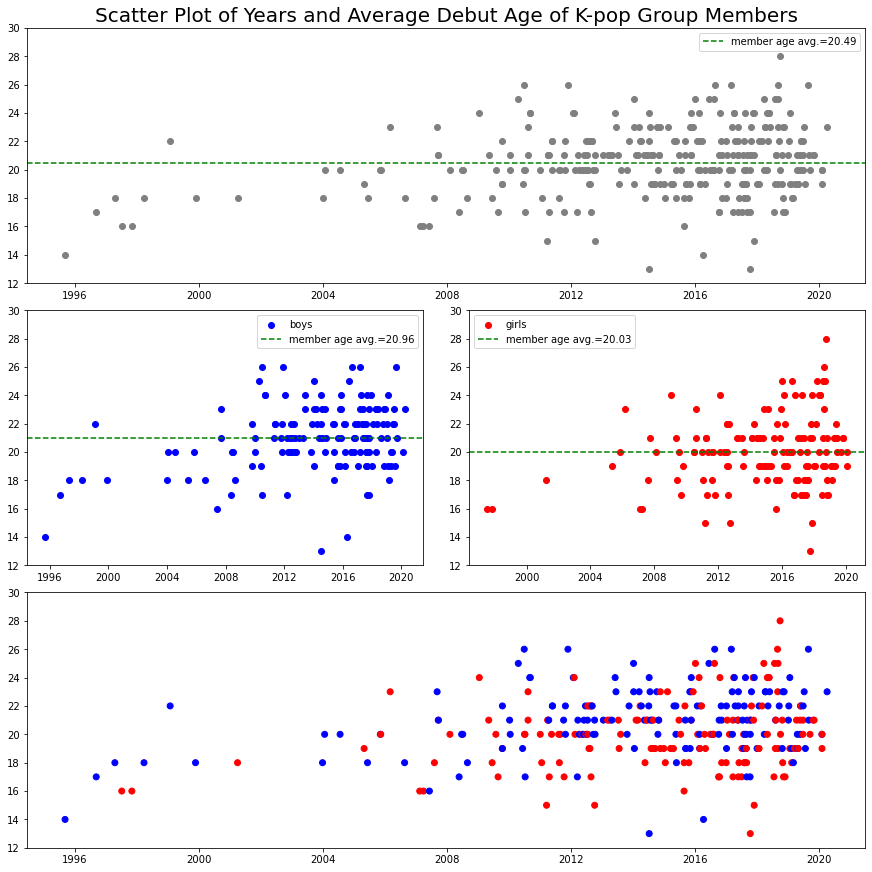

In [9]:
fig=plt.figure(layout="constrained", figsize=(12,12))
mosaic=fig.subplot_mosaic('''
                          aa
                          bc
                          dd
                          ''')

# Plot A, main
mosaic['a'].scatter(Factors["Debut"], Factors["Average_age"], c='grey')
mosaic['a'].set_title("Scatter Plot of Years and Average Debut Age of K-pop Group Members", fontsize=20)
mosaic['a'].set_ylim(12, 30)
mosaic['a'].axhline(y=Factors_age_num, color='green', linestyle='--', label="member age avg.="+str(round(Factors_age_num, 2)))
mosaic['a'].legend()

# Plot B, boys
mosaic['b'].scatter(boys_n["Debut"], boys_n["Average_age"], c="blue", label="boys")
mosaic['b'].set_ylim(12, 30)
mosaic['b'].axhline(y=boys_age_num, color='green', linestyle='--', label="member age avg.="+str(round(boys_age_num, 2)))
mosaic['b'].legend()

# Plot C, girls
mosaic['c'].scatter(girls_n["Debut"], girls_n["Average_age"], c="red", label="girls")
mosaic['c'].set_ylim(12, 30)
mosaic['c'].axhline(y=girls_age_num, color='green', linestyle='--', label="member age avg.="+str(round(girls_age_num, 2)))
mosaic['c'].legend()

# Plot D, combined
mosaic['d'].scatter(Factors["Debut"], Factors["Average_age"], c=Factors["Gender"].map({"M": "blue", "F": "red"}))
mosaic['d'].set_ylim(12, 30)

plt.show()

### 3.3 平均出道年齡與出道團員數量 散佈圖

Text(0.5, 0.98, 'Scatter Plot of Average Debut Age and the Number of Debut Members')

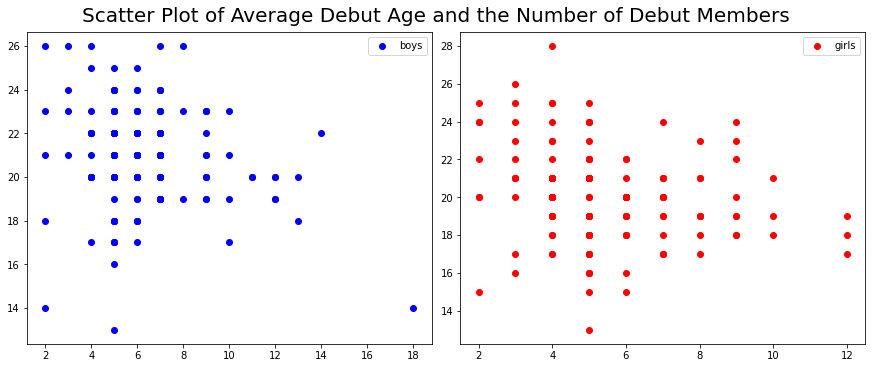

In [10]:
fig=plt.figure(layout="constrained", figsize=(12,5))
mosaic=fig.subplot_mosaic('''
                          ab
                          ''')

# Plot A, boys
mosaic['a'].scatter(boys_n["Orig. Memb."], boys_n["Average_age"], c='blue', label="boys")
mosaic['a'].legend()

# Plot B, girls
mosaic['b'].scatter(girls_n["Orig. Memb."], girls_n["Average_age"], c='red', label="girls")
mosaic['b'].legend()

plt.suptitle("Scatter Plot of Average Debut Age and the Number of Debut Members", fontsize=20)

## 4. 相關矩陣 Correlation Matrix

In [11]:
Factors["Debut_year"] = Factors["Debut"].dt.year.astype(int)
Factors["Gender"] = Factors["Gender"].replace({'M':1, 'F':0})
Factors.rename(columns={"Orig. Memb.":"Member Number", "Average_age":"Average Age", "Debut_year":"Debut Year"}, inplace=True)
corr_matrix=Factors.corr()
print(corr_matrix)

               Member Number  Average Age    Gender  Company Code  Debut Year
Member Number       1.000000    -0.157571  0.203549     -0.124617    0.207609
Average Age        -0.157571     1.000000  0.188997      0.109057    0.246457
Gender              0.203549     0.188997  1.000000     -0.501622   -0.081696
Company Code       -0.124617     0.109057 -0.501622      1.000000    0.521125
Debut Year          0.207609     0.246457 -0.081696      0.521125    1.000000


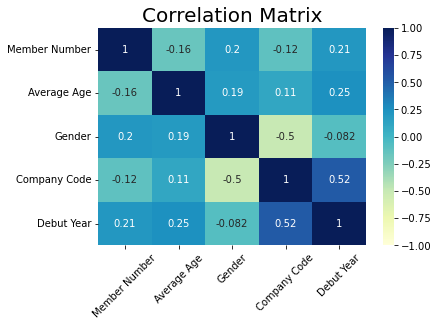

In [12]:
sn.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

## 5. 多元迴歸分析

In [13]:
# Yt資料整理
yt.set_index("Name", inplace=True)
yt["Date"]=pd.to_datetime(yt["Date"], format='%Y-%m-%d')
yt["Release Year"] = yt["Date"].dt.year.astype(int)
yt.head()

,Date,Likes,Views,Comments,Release Year
Name,,,,,
Agust D,2020-05-22,14797047,441791136,1368655,2020
Yubin,2020-05-21,53399,1184969,2722,2020
OnlyOneOf,2020-05-21,84254,7569079,3995,2020
Ryu Sujeong,2020-05-20,43251,2663847,3500,2020
Crush,2020-05-20,663484,18084352,31972,2020


In [14]:
yt["Years"]=0
yt["Avg_L"]=0
yt["Avg_V"]=0
yt["Avg_C"]=0
Factors["Likes"]=0
Factors["Views"]=0
Factors["Comments"]=0
for name in Factors.index:
    if name in yt.index:
        yt.at[name, "Years"]=yt.at[name, "Release Year"]-Factors.at[name, "Debut Year"]+1
        # Likes
        yt.at[name, "Avg_L"]=yt.at[name, "Likes"]/yt.at[name, "Years"]
        Factors.at[name, "Likes"]=yt.at[name, "Avg_L"].mean().round().astype(int)
        # Views
        yt.at[name, "Avg_V"]=yt.at[name, "Views"]/yt.at[name, "Years"]
        Factors.at[name, "Views"]=yt.at[name, "Avg_V"].mean().round().astype(int)
        #Comments
        yt.at[name, "Avg_C"]=yt.at[name, "Comments"]/yt.at[name, "Years"]
        Factors.at[name, "Comments"]=yt.at[name, "Avg_C"].mean().round().astype(int)

    else:
        Factors.drop(name, inplace=True)

Factors.head()

,Debut,Company,Member Number,Average Age,Gender,Company Code,Debut Year,Likes,Views,Comments
Name,,,,,,,,,,
H.O.T,1996-09-07,SM,5,17.0,1,1,1996,393,90719,54
S.E.S,1997-11-01,SM,3,16.0,0,1,1997,5455,140624,249
Shinhwa,1998-03-24,"SM, Good, Shinhwa",6,18.0,1,3,1998,1334,101984,104
Jewelry,2001-03-30,Star Empire,4,18.0,0,17,2001,422,73554,40
TVXQ!,2003-12-26,SM,5,18.0,1,1,2003,13966,1284981,1518


In [15]:
Factors.shape

(239, 10)

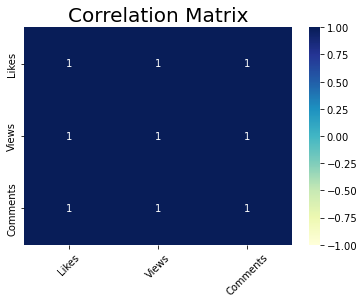

In [16]:
corr_matrix=Factors[["Likes", "Views", "Comments"]].corr()
sn.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

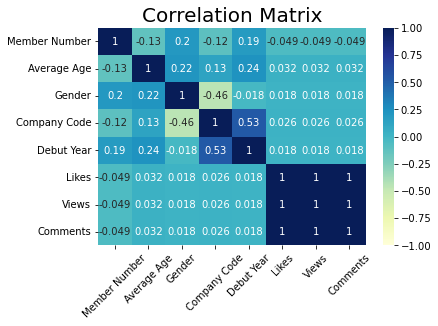

In [17]:
corr_matrix=Factors.corr()
sn.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

### 5.1 讚數

In [18]:
# 設X和Y
X=Factors[["Member Number", "Average Age", "Gender", "Company Code", "Debut Year"]]
Y=Factors[["Likes"]]

# 訓練多元迴歸模型
regressor = LinearRegression()
regressor.fit(X,Y)

accuracy = regressor.score(X,Y)
print('Score: ', accuracy)
print('Accuracy: ' + str(accuracy * 100) + '%')

Score:  0.004734814692184175
Accuracy: 0.4734814692184175%


### 5.2 觀看數

In [19]:
# 設X和Y
X=Factors[["Member Number", "Average Age", "Gender", "Company Code", "Debut Year"]]
Y=Factors[["Views"]]

# 訓練多元迴歸模型
regressor = LinearRegression()
regressor.fit(X,Y)

accuracy = regressor.score(X,Y)
print('Score: ', accuracy)
print('Accuracy: ' + str(accuracy * 100) + '%')

Score:  0.004734814691657152
Accuracy: 0.4734814691657152%


### 5.3 留言數

In [20]:
# 設X和Y
X=Factors[["Member Number", "Average Age", "Gender", "Company Code", "Debut Year"]]
Y=Factors[["Comments"]]

# 訓練多元迴歸模型
regressor = LinearRegression()
regressor.fit(X,Y)

accuracy = regressor.score(X,Y)
print('Score: ', accuracy)
print('Accuracy: ' + str(accuracy * 100) + '%')

Score:  0.004734814692189837
Accuracy: 0.4734814692189837%


### 5.4 特徵選取試驗

想試試看將正負相關高的前兩名特徵做多元迴歸是否會增加準確度

In [23]:
# 設X和Y
X=Factors[["Average Age", "Company Code"]]
Y=Factors[["Comments"]]

# 訓練多元迴歸模型
regressor = LinearRegression()
regressor.fit(X,Y)

accuracy = regressor.score(X,Y)
print('Score: ', accuracy)
print('Accuracy: ' + str(accuracy * 100) + '%')

Score:  0.0015499236081920609
Accuracy: 0.1549923608192061%


## 不太重要ㄉ垃圾區（之後會清掉

In [22]:
'''
plt.figure(figsize=(10, 10))
plt.scatter(Factors["Orig. Memb."], Factors["Average_age"], c=Factors["Gender"].map({"M": "blue", "F": "red"}))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5))
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.title("Scatter Plot of Years and Average Debut Age of K-pop Group Members")
plt.legend()
plt.show()
'''

'\nplt.figure(figsize=(10, 10))\nplt.scatter(Factors["Orig. Memb."], Factors["Average_age"], c=Factors["Gender"].map({"M": "blue", "F": "red"}))\nplt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5))\nplt.xlabel("Year")\nplt.ylabel("Average Age")\nplt.title("Scatter Plot of Years and Average Debut Age of K-pop Group Members")\nplt.legend()\nplt.show()\n'